<a href="https://colab.research.google.com/github/serraince/WildfireDetection/blob/main/GEOL0069_AI4EO_FinalProject_SerraIncekara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estimating Impact of Wildfires Using Unsupervised Classification: K-Means and Gausian Mixture Model

##Background:
In recent years, the prevalence of wildfires have seen an increase, partially related to the rising global temperatures caused by climate change (joint-research-centre.ec.europa.eu, 2023). Fast and accurate detection of wildfires is critical for minimizing their devastating ecological, social, and economic impacts. Forest ecosystems play a large role in regulating the climate, hosting various species, and sustaining livelihoods of nearby communities. The vulnerable Mediterranean region has already faced an increase in fire risk due to climate change (joint-research-centre.ec.europa.eu, 2023). This project proposes a method to make the remediation process faster.

Delays in wildfire detecting can result in underestimating the extent of damage and incorrect responses, leading to large-scale habitat destruction, loss of species, and hinder the development of surrounding communities, preventing the progress towards several Sustainable Development Goals (Aydın-Kandemir and Demir, 2023). Thus, quick and precise identification of land-change in fire-affected areas using Earth Observation and estimating the percentage in damage is essential for emergency response, post-fire strategization, biodiversity protection, and long-term level land-management planning.

Satellite imagery can be used to determine land-use-land-change (LULC). Using Sentinel 2A imagery, this code implements unsupervised classification methods on burnt areas from the 2021 Manavgat mega wildfire in Turkey. Five spectral bands (B2, B3, B4, B8A, B12) were extracted from Sentinel-2 Level-2A imagery. The two methods used in this code are K-Means Clustering (KM) and Gaussian Mixture Models (GMM). Both algorithms have been previously used in academic literature exploring wildfire detection (Jain et. al, 2020). An emission tracker developed by CodeCarbon is used to track the electricity usage of the two models.


##Sentinel 2 Satellite
The Sentinel-2 is a European mission that uses high resolution multi-spectral imaging, and is used mainly for vegetation monitoring, soil cover, and water-body observations (Copernicus, 2025).  The twin satellites fly in the same orbit, but are placed at the opposite sites, and have a 5-day revisit frequency at the Equator (Copernicus, 2025). Sentinel-2 has 13 spectral bands, and its orbital swatch width is 290 kilometres.

The MultiSpectral Instrument (MSI), which gathers the image data, uses a push-broom concept that works by collecting rows of image data across the orbital swath, and uses the forward motion of the satellite to provide new rows to gather (S2 Mission, n.d.). Light hits the Earth and is reflected back up to the MSI instrument, to be collected by a three mirror telescope, and then focused onto two Focal Plane Assemblies (S2 Mission, n.d.). The Focal Plane Assemblies are divided into two: one is for VNIR wavelengths and the other for SWIR wavelengths (S2 Mission, n.d.). Both assemblies have 12 detectors that are arranged in two horizontal rows (S2 Mission, n.d.).



B2, B3, and B4 bands were used to generate the RGB coloured images of the area, and the B8A and B12 bands were used for the algorithms


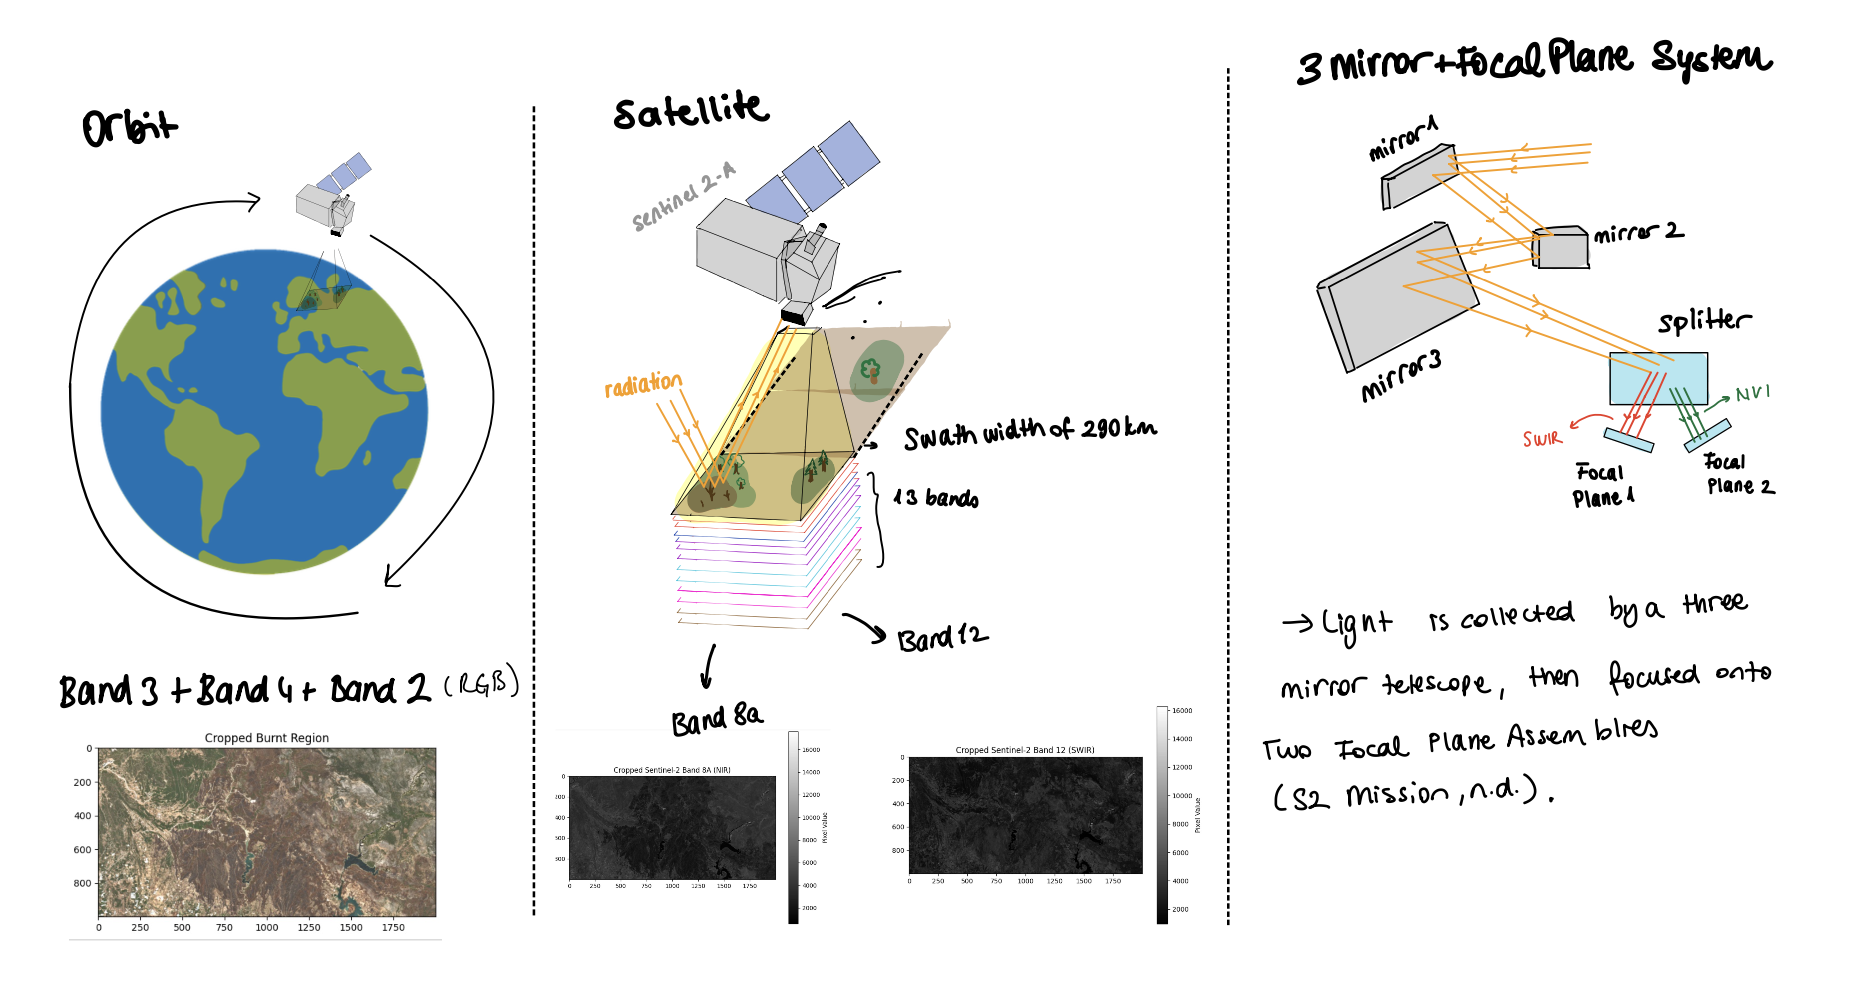

##Requirements

1) Mount your drive to Google Colab.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2) Install the following:

In [2]:
!pip install rasterio
!pip install codecarbon
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.1/610.1 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 3.1.0
    Uninstalling termcolor-3.1.0:
      Successfully uninstalled termcolor-3.1.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninst

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 4, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
^C
^C
^C


##Visualizing Area of Interest: Manavgat, Turkey (03/09/2021)

In the months of July and August 2021, Manavgat, a town in Southern Turkey, saw devastating wildfires that burnt a total of 1700 square kilometres of forest in one of the worst wildfires in the country (Ozkan and Erkoyun, 2021) . Below maps an RGB image from 03/09/2021, of a portion of Manavgat that saw significant damage.

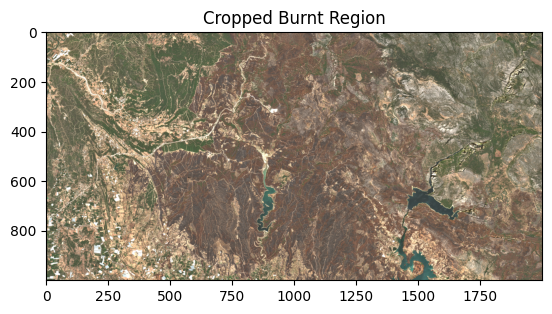

In [2]:
#Plotting area of interest:
import matplotlib.pyplot as plt
import numpy as np
import rasterio

#Specify your path and the bands used:
base_path = "/content/drive/MyDrive/AI4EO/Wildfires/Manavgat/S2A_burnt/GRANULE/L2A_T36SUF_A032379_20210903T084911/IMG_DATA/R20m"
bands_paths = {
    'B3': base_path + '/T36SUF_20210903T083601_B03_20m.jp2', #Green RGB band
    'B4': base_path + '/T36SUF_20210903T083601_B04_20m.jp2', #Red RGB band
    'B2': base_path + '/T36SUF_20210903T083601_B02_20m.jp2' #Blue RGB band
}
band_data = []
band_arrays = {}
for band in ['B4', 'B2', 'B3']:
    with rasterio.open(bands_paths[band]) as src:
        arr = src.read(1).astype(np.float32)
        band_data.append(arr)
        band_arrays[band] = arr

# Stack RGB bands
rgb = np.stack([
    band_arrays['B4'],
    band_arrays['B3'],
    band_arrays['B2']
], axis=-1)

# Normalize to [0, 1] for display
rgb_norm = rgb / np.percentile(rgb, 99)
rgb_norm = np.clip(rgb_norm, 0, 1)

# Specify the pixels for the burn area, essentially cropping the image - modify for different images with different burn patterns
row_start, row_end = 0, 1000
col_start, col_end = 2000, 4000

# Crop the cluster label image
cropped = rgb_norm[row_start:row_end, col_start:col_end]

# Plot the  area
plt.imshow(cropped)
plt.title("Cropped Burnt Region")
plt.show()

##K-Means Classification

K-means clustering is a type of unsupervised learning algorithm that partitions a dataset into a number (k) of clusters, based on the similarity of the features of the data (Tsamados and Chen, 2022). A k number of centroids (center points of each cluster) are designed, and each data point is assigned to the nearest centroid (Tsamados and Chen, 2022).
KM is suitable for large dataset applications where the data structure is not known beforehand (Tsamados and Chen, 2022). In the case of wildfires, satellite imagery can encompass large datasets, and thus KM is applicable in this case. This makes it suitable for different burn areas that could have different burn intensities and land cover.

There are three clusters: burnt area (0), forest area (1), other (2).



The Normalized Burn Ratio highlights burn areas in large fire zones, with a formula that combines near infrared (NIR), represented by Band 8a, and short infrared wavelengths (SWIR), represented by Band 12. Healthy vegetation corresponds to a high reflectance in the NIR, and low reflectance in the SWIR. A high NBR value represents healthy vegetation like forests and a low NBR value represents bare ground and burnt areas.

The NBR formula is as such:
$$
\text{NBR} = \frac{\text{NIR} - \text{SWIR}}{\text{NIR} + \text{SWIR}}
$$




Below is a demonstration of how K-Means would be seen without the NBR index.



In [3]:
#Import KMeans Clustering from SciKitLearn:
from sklearn.cluster import KMeans

#Specify your path
base_path = "/content/drive/MyDrive/AI4EO/Wildfires/Manavgat/S2A_burnt/GRANULE/L2A_T36SUF_A032379_20210903T084911/IMG_DATA/R20m"
bands_paths = {
    'B4': base_path + '/T36SUF_20210903T083601_B04_20m.jp2', #Red Band
    'B8A': base_path + '/T36SUF_20210903T083601_B8A_20m.jp2', #NIR Band
    'B12': base_path + '/T36SUF_20210903T083601_B12_20m.jp2' #SWIR Band
}



# Read and stack the band images
band_data = []
for band in ['B4']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

band_data = []
for band in ['B8A']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

band_data = []
for band in ['B12']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for K-means, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 1))

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels


###K-Means Classification Plotting

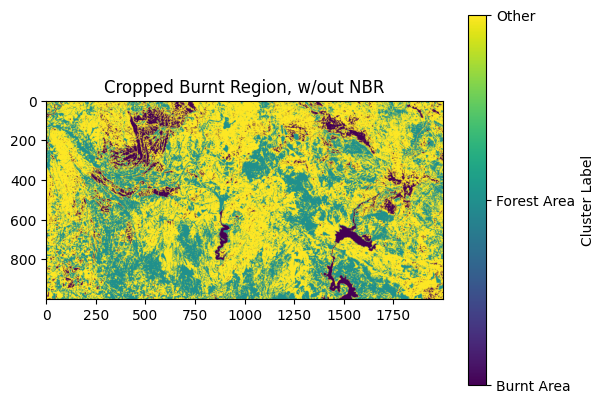

In [5]:
#Plot the area that interests us:

# Specify the Burn Area:
row_start, row_end = 0, 1000
col_start, col_end = 2000, 4000

# Crop the cluster label image
cropped_k = labels_image[row_start:row_end, col_start:col_end]

# Plot the cropped area
plt.imshow(cropped_k, cmap='viridis')
plt.title("Cropped Burnt Region, w/out NBR")
cbar = plt.colorbar(ticks=[0, 1, 2], label='Cluster Label')
cbar.ax.set_yticklabels(["Burnt Area",'Forest Area', "Other"])
plt.show()

###K-Means Classification Using Normalized Burn Ratio (NBR)

Below is the actual K-Means Classification, using the NBR. As demonstrated, without the NBR, burnt areas cannot be captured correctly by the models.

In [6]:
from codecarbon import EmissionsTracker
from sklearn.cluster import KMeans
import numpy as np
import rasterio

#Specify Path
base_path = "/content/drive/MyDrive/AI4EO/Wildfires/Manavgat/S2A_burnt/GRANULE/L2A_T36SUF_A032379_20210903T084911/IMG_DATA/R20m"

bands_paths = {
    'B8A': base_path + '/T36SUF_20210903T083601_B8A_20m.jp2', #NVI band
    'B12': base_path + '/T36SUF_20210903T083601_B12_20m.jp2', #SWIR band
}

# Load all bands
band_data = []
band_arrays = {}
for band in ['B8A', 'B12']:
    with rasterio.open(bands_paths[band]) as src:
        arr = src.read(1).astype(np.float32)
        band_data.append(arr)
        band_arrays[band] = arr

# Calculate NBR: (B8A - B12) / (B8A + B12)
nbr = (band_arrays['B8A'] - band_arrays['B12']) / (band_arrays['B8A'] + band_arrays['B12'] + 1e-6)
band_data.append(nbr)

# Stack all bands + NBR
band_stack = np.stack(band_data, axis=-1)

# Valid data mask
valid_data_mask = np.all(band_stack > 0, axis=2)

# Prepare data for clustering
X = band_stack[valid_data_mask]

#Start CodeCarbon Emissions Tracker for K-Means, save it to a csv file to extract later
tracker_km = EmissionsTracker(output_file='emissions_km.csv')
tracker_km.start()

# Run K-means
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Assign labels to original image shape
labels_image_ = np.full(band_stack.shape[:2], 0, dtype=int)
labels_image_[valid_data_mask] = labels

#Stop Tracker for K-Means
tracker_km.stop()

[codecarbon WARNING @ 12:43:00] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 12:43:00] [setup] RAM Tracking...
[codecarbon INFO @ 12:43:00] [setup] CPU Tracking...
[codecarbon WARNING @ 12:43:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 12:43:02] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 12:43:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 12:43:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 12:43:02] [setup] GPU Tracking...
[codecarbon INFO @ 12:43:02] No GPU found.
[codecarbon INFO @ 12:43:02] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

5.1073014100272515e-05

###Plotting K-Means Classification with NBR

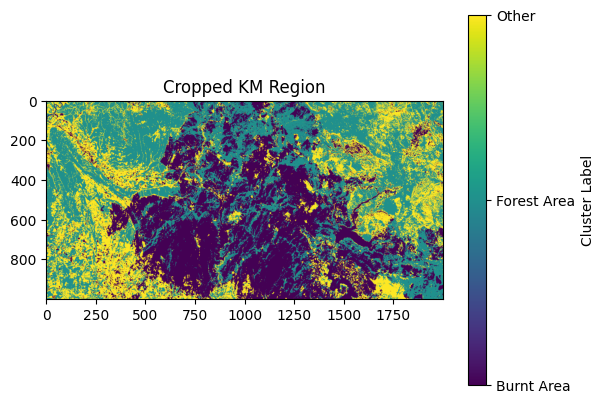

In [7]:
#Plot the area that interests us (the burnt area):
# Manually specify the pixel bounds for the zoomed-in burn area
row_start, row_end = 0, 1000
col_start, col_end = 2000, 4000

# Crop the cluster label image
cropped_kk = labels_image_[row_start:row_end, col_start:col_end]

# Plot the cropped area
plt.imshow(cropped_kk, cmap='viridis')
plt.title("Cropped KM Region")
cbar = plt.colorbar(ticks=[0, 1, 2], label='Cluster Label')
cbar.ax.set_yticklabels(["Burnt Area", 'Forest Area', "Other"])

#plt.colorbar(label='Cluster Label')
plt.show()


In [9]:
#Calculate percentage of burnt area -determined from pixels
other_km = 2
burnt_km = 0
forest_km = 1
total_km_count = np.sum(cropped_kk != other_km + burnt_km + forest_km)
print(f"Number of pixels in the cropped KM image: {total_km_count}")
purple_pixel_count_km = np.sum(cropped_kk == burnt_km)
print(f"Number of purple pixels in the cropped KM image: {purple_pixel_count_km}")

ratio_km = purple_pixel_count_km / total_km_count
print(f"Ratio of purple pixels to total pixels: {ratio_km}")

print(f"{ratio_km*100}% OF THE AREA IS BURNT")

Number of pixels in the cropped KM image: 2000000
Number of purple pixels in the cropped KM image: 691474
Ratio of purple pixels to total pixels: 0.345737
34.5737% OF THE AREA IS BURNT


##Gaussian Mixture Models

**How GMM Works:**

GMMs are unsupervised clustering algorithms that model data as a mixture of different Gaussian distributions (Tsamados and Chen, 2025). They are soft-clustering methods, assigning probabilities to each point belonging to each cluster. Where K-Means is a more “strict” clustering method, GMM incorporates probability, making it more flexible.

**Features of GMM:**

1.   Number of components -similar to clusters in K-Means.
2.   Expectation-Maximization Algorithm, where the Expectation step calculate the probability of a point belonging to a cluster and the Maximisation step updates the parameters of the Gaussians and the process (Tsamados and Chen, 2025).
3.   Cluster shapes - the shape and size of the clusters are determined by the covariance type of the Gaussians (Tsamados and Chen, 2025).
4.   Repetition until the parameters converge.

GMM is suitable for modeling complex shapes; hence, it was chosen for this project due to its ability to detect changes in natural land cover. Since natural land can be complex, the flexibility in GMM clustering is appropriate.

Clusters must be remapped in case the labelling is different than KM.

###GMM Implementation

[codecarbon WARNING @ 12:57:00] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 12:57:00] [setup] RAM Tracking...
[codecarbon INFO @ 12:57:00] [setup] CPU Tracking...
[codecarbon WARNING @ 12:57:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 12:57:02] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 12:57:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 12:57:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 12:57:02] [setup] GPU Tracking...
[codecarbon INFO @ 12:57:02] No GPU found.
[codecarbon INFO @ 12:57:02] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

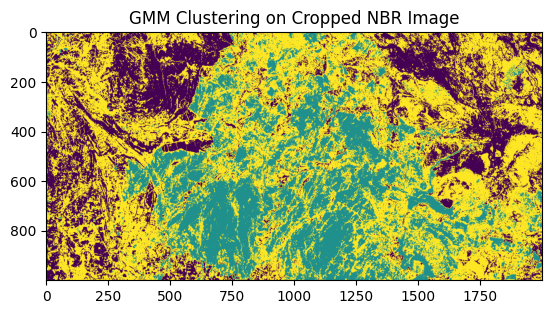

[codecarbon INFO @ 12:57:10] Energy consumed for RAM : 0.000022 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 12:57:10] Delta energy consumed for CPU with constant : 0.000094 kWh, power : 42.5 W
[codecarbon INFO @ 12:57:10] Energy consumed for All CPU : 0.000094 kWh
[codecarbon INFO @ 12:57:10] 0.000117 kWh of electricity used since the beginning.


2.5503655778880786e-05

In [10]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from codecarbon import EmissionsTracker

# Paths to the band images
base_path = "/content/drive/MyDrive/AI4EO/Wildfires/Manavgat/S2A_burnt/GRANULE/L2A_T36SUF_A032379_20210903T084911/IMG_DATA/R20m"
bands_paths = {
    'B8A': base_path + '/T36SUF_20210903T083601_B8A_20m.jp2',  # NIR
    'B12': base_path + '/T36SUF_20210903T083601_B12_20m.jp2',  # SWIR
}

# Crop bounds, so that GMM isn't too overburdened
row_start, row_end = 0, 1000
col_start, col_end = 2000, 4000

# Read and crop both bands
with rasterio.open(bands_paths['B8A']) as nir_src:
    nir = nir_src.read(1)[row_start:row_end, col_start:col_end].astype('float32')

with rasterio.open(bands_paths['B12']) as swir_src:
    swir = swir_src.read(1)[row_start:row_end, col_start:col_end].astype('float32')

# Avoid divide-by-zero
denominator = nir + swir
denominator[denominator == 0] = np.nan

# Calculate the NBR index
nbr = (nir - swir) / denominator

# Create mask for valid NBR pixels
valid_mask = ~np.isnan(nbr)

# Prepare data for GMM
X = nbr[valid_mask].reshape(-1, 1)

#Start Emissions Tracker for GMM
tracker_gmm = EmissionsTracker(output_file='emissions_gmm.csv')
tracker_gmm.start()

# Run GMM clustering
gmm = GaussianMixture(n_components=3, random_state=0).fit(X)
labels = gmm.predict(X)

# Create label image
label_image = np.full(nbr.shape, -1, dtype=int)
label_image[valid_mask] = labels
cropped_gmm = label_image

# Plot result
plt.imshow(cropped_gmm, cmap='viridis')
plt.title('GMM Clustering on Cropped NBR Image')
plt.show()

#Stop Tracker for GMM
tracker_gmm.stop()

###GMM Plotting

Clustering colours are remapped to compare GMM with KM+NBR.

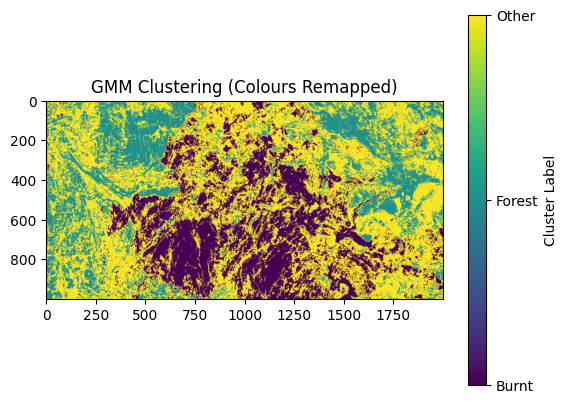

In [11]:
# Swap cluster labels: match the labels to the colours of the K-Means Algorithm
remapped_labels = label_image.copy()

remapped_labels[remapped_labels == 2] = 2
remapped_labels[label_image == 0] = 1
remapped_labels[label_image == 1] = 0

plt.imshow(remapped_labels, cmap='viridis')
plt.title('GMM Clustering (Colours Remapped)')
cbar = plt.colorbar(ticks=[0,1,2], label='Cluster Label')
cbar.ax.set_yticklabels(["Burnt", "Forest", "Other"])
plt.show()


In [13]:
#Calculate percentage of burnt area -determined from pixels
other_gmm = 3
burnt_gmm = 1
forest_gmm = 2

total_gmm_count = np.sum(cropped_gmm != other_gmm + burnt_gmm + forest_gmm)
print(f"Number of pixels in the cropped GMM image: {total_gmm_count}")
purple_pixel_count = np.sum(cropped_gmm == burnt_gmm)
print(f"Number of purple pixels in the cropped GMM image: {purple_pixel_count}")

ratio_gmm = purple_pixel_count / total_gmm_count
print(f"Ratio of purple pixels to total pixels: {ratio_gmm}")

print(f"{ratio_gmm*100}% OF THE AREA IS BURNT")

Number of pixels in the cropped GMM image: 2000000
Number of purple pixels in the cropped GMM image: 502854
Ratio of purple pixels to total pixels: 0.251427
25.1427% OF THE AREA IS BURNT


##Analysis: Qualitative and Quantitative

###Quantitative Analysis:

In this case, the confusion matrix shows how similar the models are to each other, rather than the accuracy of each model. Thus, in this case, the accuracy refers to how GMM (y_pred) is similar to KM (y_true).

Class 0 (Burnt Area) achieves very high precision (1.00) but a moderate recall (0.73), which indicates that when the model predicts a pixel as burnt, it is highly accurate, but it misses a notable portion of burnt pixels. Class 1 (Forest) has strong precision (0.86) but only 50% recall, meaning many forest pixels are misclassified as other classes. Class 2 (Other) has high recall (0.86) but low precision (0.40), indicating that the model often over-predicts this class.

Aligned Confusion Matrix:
 [[502854    217 188403]
 [     0 416137 417618]
 [     0  67864 406907]]

Aligned Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.73      0.84    691474
     Class 1       0.86      0.50      0.63    833755
     Class 2       0.40      0.86      0.55    474771

    accuracy                           0.66   2000000
   macro avg       0.75      0.69      0.67   2000000
weighted avg       0.80      0.66      0.68   2000000



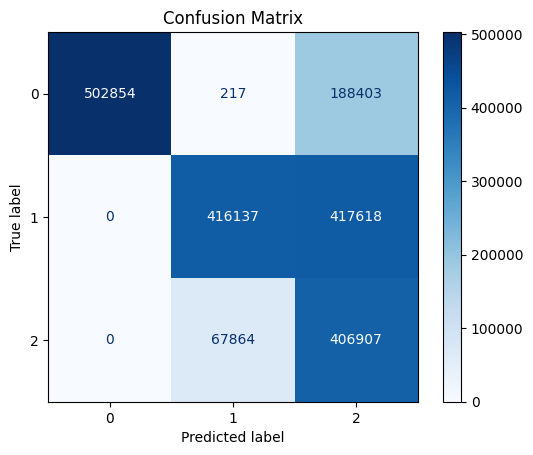

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.optimize import linear_sum_assignment

# Mask out no-data (−1) in either array
valid = (cropped_kk >= 0) & (cropped_gmm >= 0)
y_true = cropped_kk[valid].ravel()
y_pred = remapped_labels[valid].ravel()

# Build contingency and solve assignment
cm = confusion_matrix(y_true, y_pred)

# We want to maximize matches, so solve on (max−cm)
row_ind, col_ind = linear_sum_assignment(cm.max() - cm)

# Map each pred → true label
mapping = {pred: true for true, pred in zip(col_ind, row_ind)}
y_pred_aligned = np.array([mapping[p] for p in y_pred])

# Recompute metrics with aligned labels
cm_aligned = confusion_matrix(y_true, y_pred_aligned)
print("Aligned Confusion Matrix:\n", cm_aligned)

print("\nAligned Classification Report:")
print(classification_report(
    y_true,
    y_pred_aligned,
    zero_division=0,
    target_names=[f"Class {i}" for i in range(cm_aligned.shape[0])]
))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_true)))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

###Qualitative Analysis
Both maps output generally well with the RGB reference, and show a clear distinction of the burnt region in the centre. However, GMM misses some burnt area spots copmared to KM
. Since this project focuses on the ratio of burnt areas, even though GMM has a better spatial variation, KM performs better in detecting burnt vs forest areas.

**Therefore, in this case, KM is the preferable model**


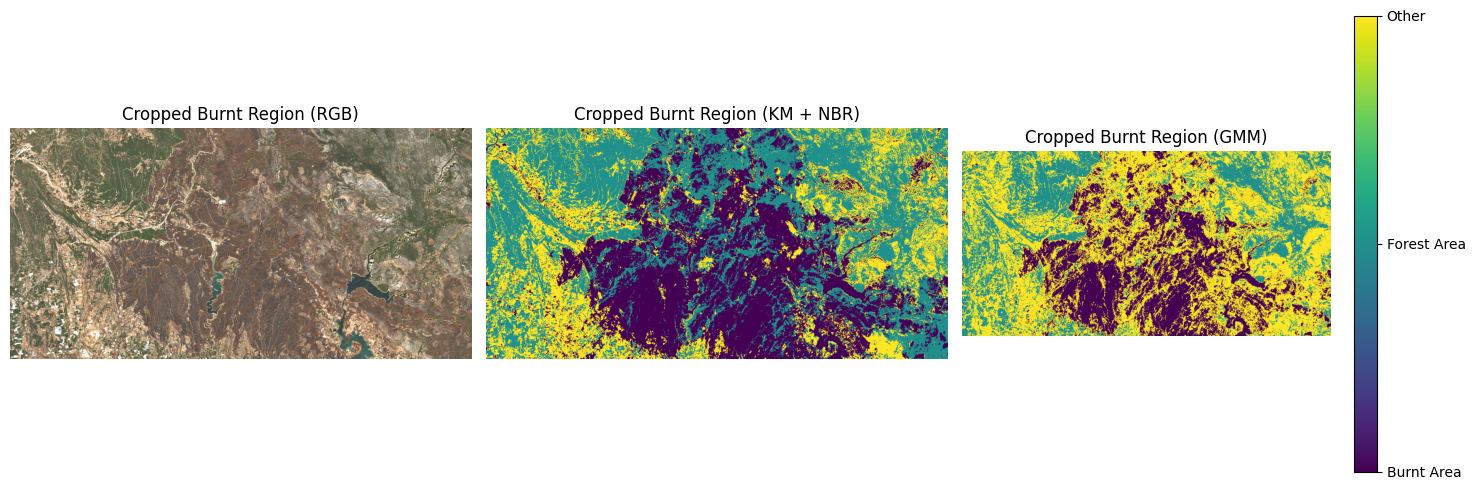

In [16]:
#Plot the three plots (RGB, KM+NBR and GMM) side-by side and compare visually
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#RGB image:
axes[0].imshow(cropped)
axes[0].set_title("Cropped Burnt Region (RGB)")
axes[0].axis('off')

# KM+NBR image
kmimage = axes[1].imshow(cropped_kk, cmap='viridis')
axes[1].set_title("Cropped Burnt Region (KM + NBR)")
axes[1].axis('off')

# Remapped GMM image
gmmimage = axes[2].imshow(remapped_labels, cmap='viridis')
axes[2].set_title("Cropped Burnt Region (GMM)")
axes[2].axis('off')

# Add colorbar
cbar1 = fig.colorbar(gmmimage, ax=axes[2], ticks=[0, 1, 2])
cbar1.ax.set_yticklabels(["Burnt Area", 'Forest Area', "Other"])

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Show the plots
plt.show()

##Environmental Impact

The rise in Artificial Intelligence (AI) usage has meant new ways to extract, interpret or extrapolate from data. However, it is important to note the downsides of using AI (namely its energy intensity), and to weigh the advantages and disadvantages of using such technology in models. For example, if the model is used in a project that aims to decrease carbon emissions, an energy analysis of the model itself should be done to ensure that the preventative measure does not offset the decrease in emissions significantly.

There are two main methods for estimating AI energy use (O’Donnell and Crownhart, 2025). The first method is a supply-chain method that calculates energy consumption by scaling up from hardware specifications, including how many AI chips are deployed and their power usage (O’Donnell and Crownhart, 2025). The second approach is a bottom-up approach, which directly measures the energy used for specific models or tasks using models.

In this code, an open-source model named CodeCarbon was used. CodeCarbon calculates energy use by tracking the CPU, GPU and RAM usage of a code, estimating the power draw of the hardware in watts, measuring how long the code lasts, and finally estimating carbon emissions from Electricity Maps linked to the device’s IP (mlco2.github.io, n.d.).

In general, GPUs require greater energy than CPUs (Huang et. al, 2009). Additionally, larger amounts of data correspond to more RAM need, and more power consumption from the RAM. In GMM models, this is a limitation factor into the model’s success in laptop computers; this model used a smaller, cropped image to bypass the RAM overexertion issue, resulting in a lower energy use.

For a Python 3 runtime, a System RAM of 12.7GB max, a CPU from Google Cloud (model Intel(R) Xeon(R) CPU at 2.20GHz) and no GPU models, the K-Means Cluster with NBR and GMM both vary in values between 0.00005-0.0003 kWh. These values may vary slightly for different types of computers, runtimes and systems. In this code, GMM is relatively lower emitting than KM.

AI codes that involve images are more energy and carbon intensive than those with just text (Luccioni et. al, 2024). Also, model training is more carbon intensive than inference; since this model uses two clustering models for unsupervised learning, it requires no training, and is thus more energy-efficient compared to supervised training techniques (Luccioni et. al, 2024).  On average, image-to-category techniques produced less emissions than text-to-image and image to text techniques (Luccioni et. al, 2024).

This model can be made more energy efficient by decreasing the amount of clusters in each model, the amount of data plugged into each model, and by disregarding the non-NBR K-means clustering system and GMM. Overall, for this method of wildfire detection, GMM uses less electricity.


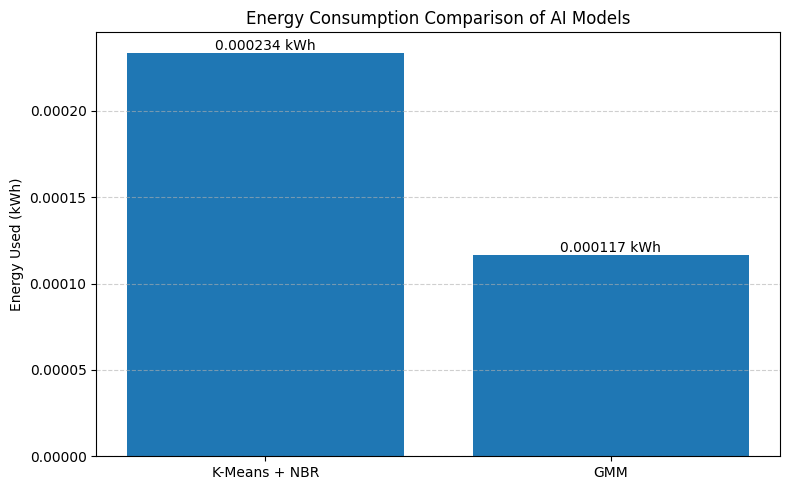

In [17]:
import pandas as pd

# Read energy usage from the CodeCarbon CSV files
try:
    emissions_km_df = pd.read_csv('emissions_km.csv')
    energy_km = emissions_km_df['energy_consumed'].iloc[-1]
except FileNotFoundError:
    energy_km = 0  # Or handle as an error, depending on desired behavior
    print("emissions_km.csv not found. Setting K-Means energy to 0.")

try:
    emissions_gmm_df = pd.read_csv('emissions_gmm.csv')
    energy_gmm = emissions_gmm_df['energy_consumed'].iloc[-1]
except FileNotFoundError:
    energy_gmm = 0  # Or handle as an error
    print("emissions_gmm.csv not found. Setting GMM energy to 0.")


# Energy usage values (in kWh)
models = ['K-Means + NBR', 'GMM']
energy_usage = [energy_km, energy_gmm]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(models, energy_usage)

# Annotate bars with exact values
for bar, energy in zip(bars, energy_usage):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{energy:.6f} kWh',
             ha='center', va='bottom')

plt.title('Energy Consumption Comparison of AI Models')
plt.ylabel('Energy Used (kWh)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()